# 04 - Statistical Modeling

In [15]:
import pandas as pd
import json
import glob
import requests
import time
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import os
import networkx as nx
import ntpath

In [16]:
myKey = "6aacc2fb-5fb7-4b4e-8250-e5005b85e22b"

In [17]:
champions = []
path = os.getcwd() + '/champData/'
champions =glob.glob(path+ '*')
champDict= {}

for champ in champions:
    with open(champ) as f:
        c = ntpath.basename(champ)
        for line in f:
            line = line.split(':')
            line[1] = line[1].rstrip('\n')

            champName = line[0]
            champPoints = line[1]

            champPoints = ''.join(x for x in champPoints if x.isdigit())

            if c not in champDict:
                champDict[c] = {}

            if champName not in champDict[c]:
                champDict[c][champName] = float(champPoints)
            else:
                champDict[c][champName] = float(champDict[c][champName]) + float(champPoints)
df = pd.DataFrame.from_dict(champDict)

In [20]:
champColumns = list(df.columns.values)
champIndices = list(df.index.values)
df.head()

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Ashe,Azir,Bard,...,Wukong,Xerath,Xin Zhao,Yasuo,Yorick,Zac,Zed,Ziggs,Zilean,Zyra
Aatrox,NaN,62663,79524,66355,53660,7184,131344,117117,88231,70870,...,254036,1547,290640,930682,126,125407,584166,1819,12267,15753
Ahri,137690,NaN,290961,132582,135659,341351,588513,511910,813214,296654,...,404687,102764,151371,3164785,172,97355,2365022,10084,177015,56914
Akali,210623,398248,NaN,34162,73733,46406,140887,155327,87780,86135,...,292559,1644,105661,1455723,NaN,11991,787763,387,21172,18438
Alistar,135150,338210,80784,NaN,135584,142842,277861,455449,238432,861429,...,293882,17396,191397,1547364,4069,150726,1053978,20145,350369,96729
Amumu,65043,501574,69083,191098,NaN,186437,504631,616211,97597,221173,...,464085,25736,417966,943488,9095,32685,628531,61149,225983,71935


In [21]:
maxNum = df.max()
i = 0
for col in champColumns:
    df[col] = df[col] / maxNum[i]
    i = i + 1

In [22]:
df.head()

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Ashe,Azir,Bard,...,Wukong,Xerath,Xin Zhao,Yasuo,Yorick,Zac,Zed,Ziggs,Zilean,Zyra
Aatrox,NaN,0.027644,0.236656,0.083611,0.065592,0.014586,0.120968,0.078986,0.079926,0.038614,...,0.205189,0.006268,0.184419,0.087878,0.002003,0.356861,0.079700,0.013133,0.035012,0.054346
Ahri,0.362394,NaN,0.865873,0.167061,0.165825,0.693055,0.542019,0.345244,0.736672,0.161633,...,0.326872,0.416342,0.096049,0.298830,0.002734,0.277036,0.322670,0.072806,0.505224,0.196345
Akali,0.554350,0.175691,NaN,0.043046,0.090129,0.094219,0.129757,0.104756,0.079518,0.046931,...,0.236305,0.006661,0.067045,0.137454,NaN,0.034122,0.107478,0.002794,0.060428,0.063608
Alistar,0.355708,0.149205,0.240406,NaN,0.165733,0.290016,0.255909,0.307165,0.215990,0.469352,...,0.237373,0.070479,0.121446,0.146107,0.064677,0.428909,0.143799,0.145445,1.000000,0.333701
Amumu,0.171190,0.221275,0.205585,0.240795,NaN,0.378528,0.464764,0.415587,0.088411,0.120507,...,0.374849,0.104268,0.265210,0.089087,0.144565,0.093009,0.085753,0.441490,0.644986,0.248166


In [95]:
def getLargest(champ):
    df2 = df
    output = df2.loc[df2[champ] >= 0.8]
    return list(output.index.values)

In [64]:
getLargest('Aatrox')


['Master Yi']

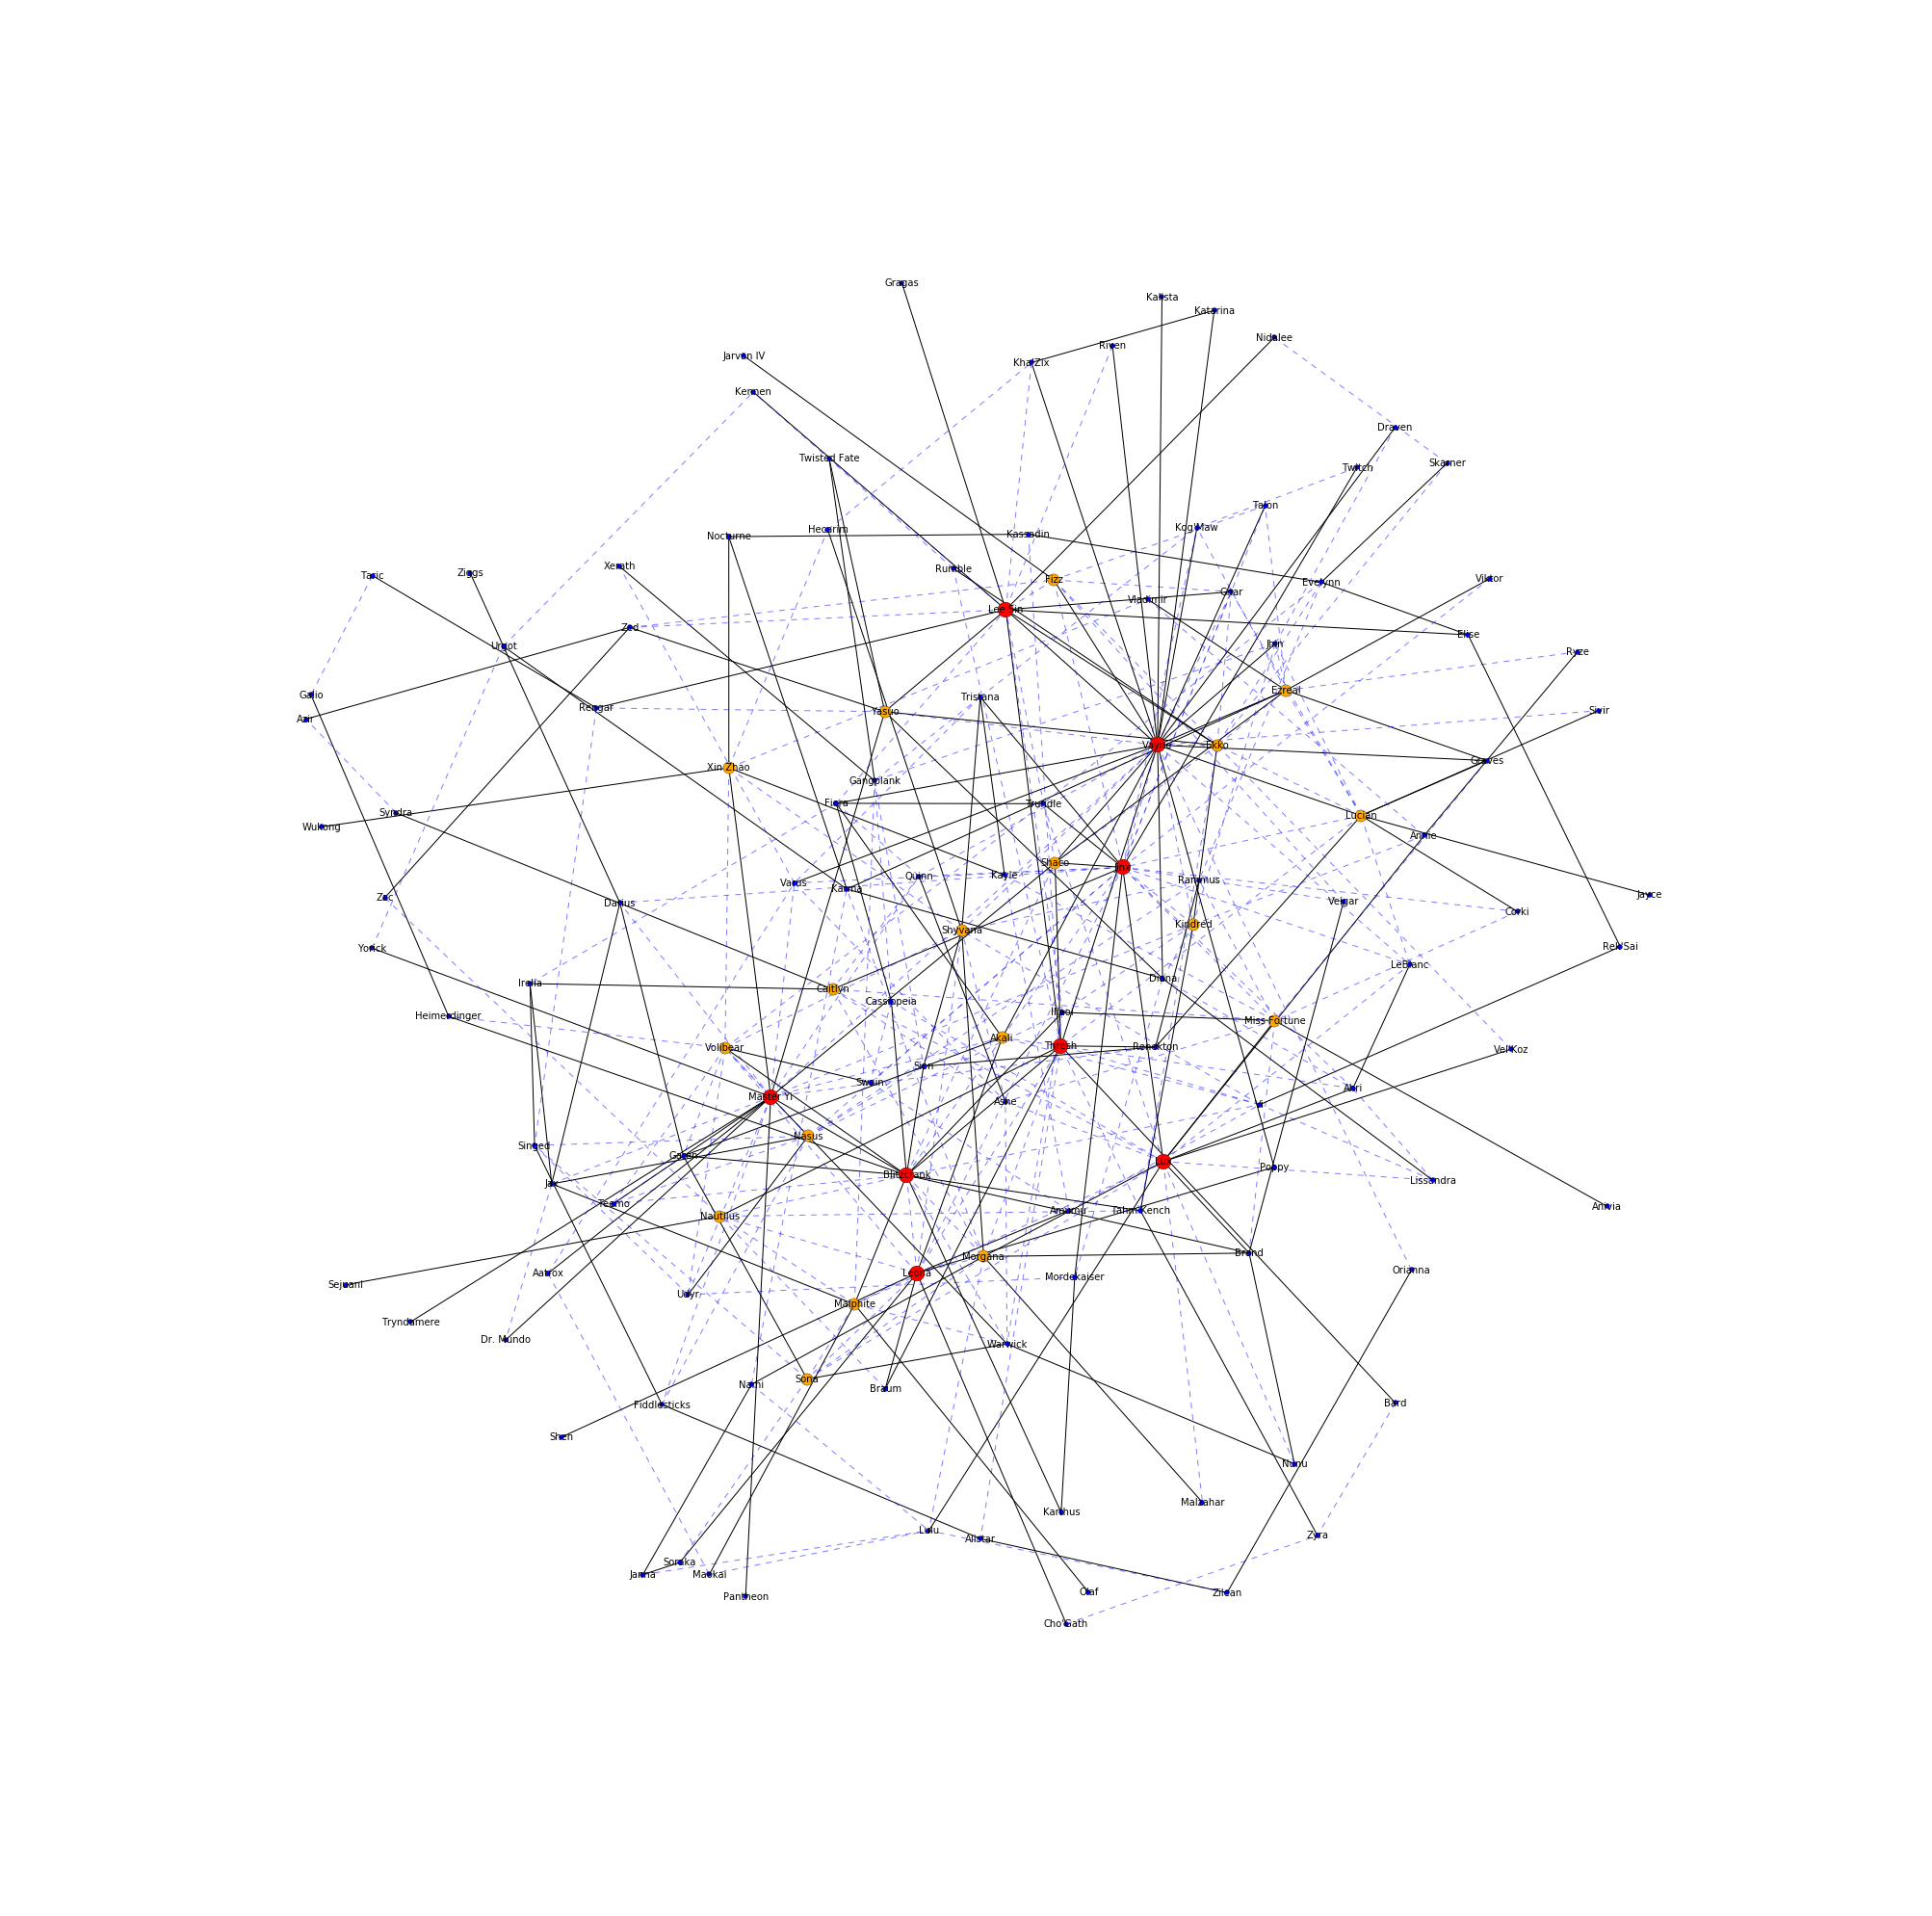

In [113]:
import networkx as nx

G=nx.Graph()

for champA in champColumns:
    champB = getLargest(champA)
    for b in champB:
        G.add_edge(champA,b, weight = df[champA][b])


plt.figure(figsize=(35,35))    
node_color=[float(G.degree(v)) for v in G]
pos=nx.spring_layout(G) 

nx.draw_networkx_nodes(G,pos,node_size=25, nodelist = [v for v in G if G.degree(v)], node_color = 'b')
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist = [v for v in G if G.degree(v) > 7], node_color = 'Orange')

nx.draw_networkx_nodes(G,pos,node_size=250, nodelist = [v for v in G if G.degree(v) >= 15], node_color = 'r')


elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.95]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.95]

nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed')


nx.draw_networkx_labels(G,pos,font_size=10,font_family='arial')


plt.axis('off')
plt.savefig("weighted_graph.png") 
plt.show()

In [76]:
for v in G:
    print(G.degree(v))

7
17
15
5
10
1
3
4
2
3
15
6
3
8
2
2
11
6
22
10
2
5
12
9
2
4
28
9
7
5
9
24
9
15
12
7
6
3
21
7
3
5
4
11
2
3
4
14
3
9
12
4
9
1
12
16
5
2
9
1
7
2
16
11
17
3
2
3
7
14
8
7
21
4
36
5
3
9
12
6
4
3
5
5
4
7
9
4
8
9
3
2
4
3
10
3
5
8
3
8
7
10
3
7
6
6
3
13
20
3
6
3
3
2
2
30
3
4
3
1
2
2
3
3
6
6
2
5
3
